In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Generate Samples

In [2]:
N = 100
X = np.random.rand(N)
Y = 2*X - 1 + np.random.normal(0, 0.15, N)

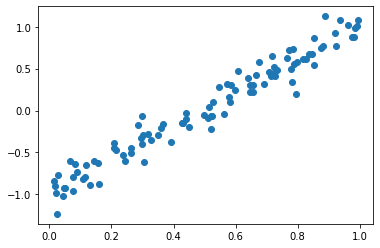

In [3]:
plt.scatter(X,Y)

# Calculate $\theta_0$ and $\theta_1$

In [4]:
xbar = np.mean(X)
ybar = np.mean(Y)


In [5]:
Theta1 = np.sum((X - xbar) * (Y - ybar)) / np.sum(np.power(X - xbar,2))
Theta0 = ybar - Theta1 * xbar

In [6]:
Theta0, Theta1

(-0.9759448619672254, 1.9919813483108328)

$f(x) = \theta_0 + \theta_1x$



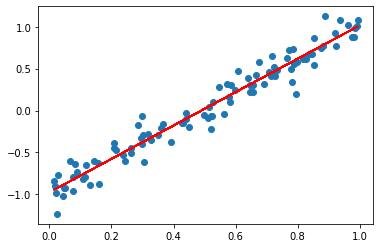

In [7]:
plt.scatter(X,Y)
plt.plot(X, Theta0 + Theta1 *X, color = 'r')

# Automatically Differentiation

In [8]:
# Variable
x0 = tf.Variable(1.0)
# Not traiable
x1 = tf.Variable(2.0, trainable = False)
# Not variable because variable + constant = tensor
x2 = tf.Variable(3.0) + 1.0
# Not variable
x3 = tf.constant(4.0)

with tf.GradientTape() as tape:
  y = x0**2 + x1**2 + x2**2

grad = tape.gradient(y, [x0, x1, x2, x3])

In [9]:
grad

[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>, None, None, None]

In [10]:
x = tf.Variable(1.)
y = tf.Variable(2.)

with tf.GradientTape() as tape:
  z = y * y
dz_dy = tape.gradient(z , y)

print(dz_dy)

tf.Tensor(4.0, shape=(), dtype=float32)


$f(x) = x^2$

$g(x) = \frac{1}{x}$

$h(x) = g \circ f(x) = \frac{1}{x^2}$

In [11]:
x = tf.Variable(1.)

with tf.GradientTape() as tape:
  y0 = x**2
  y1 = 1/y0

dy1_dy0 = tape.gradient(y1 , y0)

print(dy1_dy0)

tf.Tensor(-1.0, shape=(), dtype=float32)


# Building Model from Scratch

In [12]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.theta0 = tf.Variable(np.random.uniform())
    self.theta1 = tf.Variable(np.random.uniform())

  def __call__(self, x):
    return self.theta1 * x + self.theta0


In [13]:
def loss(target, predicted):
  return tf.reduce_mean(tf.square(target - predicted))

$\theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j}$

In [14]:
def train(model, x, y, learning_rate = 0.1):
  with tf.GradientTape() as tape:
    current_loss = loss(y, model(x))
  
  d_theta0, d_theta1 = tape.gradient(current_loss, [model.theta0, model.theta1])

  model.theta0.assign_sub(learning_rate * d_theta0)
  model.theta1.assign_sub(learning_rate * d_theta1)

In [16]:
def training_loop(model, x, y, epochs, alpha):
  for epoch in range(1, epochs+1):
    if epoch % 10 == 0:
      alpha = alpha * 0.9 
    train(model, x, y, learning_rate = alpha)

In [17]:
model = MyModel()
training_loop(model, X, Y , 100, 0.1)

In [18]:
model.theta0, model.theta1

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.47964266>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0767517>)

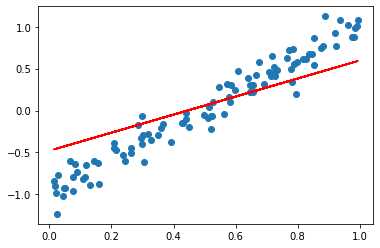

In [21]:
plt.scatter(X,Y)
plt.plot(X, model(X), color = 'r')